In [2]:
import pandas as pd
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt

### Loading the data and quick preprocessing:
* Loading 
    * dataset from sklearn.datasets
    * convert data in dataframe including features and target
* Quick check and preprocessing
    * recap of the data
    * check the presence of null values
    * separate the features from the target values
    * split train and test set
    * standardize the data (fit only the train set)

In [3]:
#Loading the breast cancer dataset from sklearn
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()
print(breast_cancer_dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [63]:
print(breast_cancer_dataset["data"])
print(breast_cancer_dataset["target"])

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [64]:
for target, name in zip([0, 1],breast_cancer_dataset["target_names"]):
    print(f"Target {target} corresponds to {name}")


Target 0 corresponds to malignant
Target 1 corresponds to benign


In [5]:
#Converting the dataset to a dataframe
df = pd.DataFrame(data=breast_cancer_dataset["data"],columns=breast_cancer_dataset["feature_names"])
#Adding the target : {0: Malignant; 1: Benign}
df["Target"] = breast_cancer_dataset["target"]
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
#Checking for null values
df.isnull().sum(axis=0)

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Target                     0
dtype: int64

In [8]:
#Checking for imbalance values
df["Target"].value_counts()

Target
1    357
0    212
Name: count, dtype: int64

In [9]:
#Separate features X to target Y
X = df.drop(labels="Target",axis=1)
Y = df["Target"]


In [10]:
#Separate the train set to the test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)


(455, 30) (114, 30) (455,) (114,)


In [11]:
#Standardize the data by removing the mean and substract the standard deviation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
# Attention: we don't want to fit the test set to avoid data leakage
X_test_std =scaler.transform(X_test)




##### Time to construct our NN

In [12]:
import tensorflow as tf
#Set the random seed to allow tensorflow generates consistent random values
tf.random.set_seed(3)
from tensorflow import keras


In [29]:
#Construct the architecture of the NN
model = keras.Sequential([keras.layers.Flatten(input_shape=(30,)),
                  keras.layers.Dense(20,activation="relu"),
                  keras.layers.Dense(1,activation="sigmoid")
    
])

In [34]:
#compile the NN specifying optimiser, loss function, and metric evalution.
#1Adam is a well established optimisation algorithm
#Asparse_categorical_crossentropy adaped multi-class classification problems where the target  is an integer.
#accuracy : the proportion of correct predictions out of the total predictions made.
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [35]:
#Train the model
#Epochs: number of iteration
#batch_size: chunk the train set
history = model.fit(X_train_std,Y_train,epochs=10,batch_size=32,validation_split=0.1)


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.8469 - loss: 0.5004 - val_accuracy: 0.9348 - val_loss: 0.2686
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8865 - loss: 0.3988 - val_accuracy: 0.9565 - val_loss: 0.2108
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8972 - loss: 0.3242 - val_accuracy: 0.9348 - val_loss: 0.1723
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9048 - loss: 0.2689 - val_accuracy: 0.9348 - val_loss: 0.1467
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9216 - loss: 0.2281 - val_accuracy: 0.9348 - val_loss: 0.1288
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9299 - loss: 0.1966 - val_accuracy: 0.9348 - val_loss: 0.1158
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9402 - loss: 0.1719 - val_accuracy: 0.9565 - val_loss: 0.1062
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9409 - loss: 0.1521 - val_accuracy: 0.9565 - val_loss

In [36]:
#Display the accuracy, loss, val_accuracy, val_loss for each iteration or epoch
history.history

{'accuracy': [0.8435207605361938,
  0.8875305652618408,
  0.8973104953765869,
  0.9046455025672913,
  0.9193153977394104,
  0.92665034532547,
  0.9364303350448608,
  0.9388753175735474,
  0.95110023021698,
  0.9535452127456665],
 'loss': [0.48400449752807617,
  0.3940117061138153,
  0.32687127590179443,
  0.2763104736804962,
  0.23823294043540955,
  0.20838378369808197,
  0.1840694099664688,
  0.16411219537258148,
  0.1480432003736496,
  0.13468264043331146],
 'val_accuracy': [0.9347826242446899,
  0.95652174949646,
  0.9347826242446899,
  0.9347826242446899,
  0.9347826242446899,
  0.9347826242446899,
  0.95652174949646,
  0.95652174949646,
  0.95652174949646,
  0.95652174949646],
 'val_loss': [0.26861393451690674,
  0.2107584923505783,
  0.17229494452476501,
  0.14670169353485107,
  0.12879355251789093,
  0.11579442769289017,
  0.10623958706855774,
  0.09897202253341675,
  0.0932386964559555,
  0.08852322399616241]}

In [37]:
#Evaluate the model on unseen data
test_accuracy = model.evaluate(X_test_std,Y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9265 - loss: 0.1526 


In [38]:
#For medical prediction, the accuracy could not be the best metrics
y_pred_prob = model.predict(X_test_std)
print(y_pred_prob)
#The values correspond to probabilities

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[[6.44317150e-01]
 [3.90058845e-01]
 [9.97605026e-01]
 [6.76654316e-13]
 [3.46074194e-01]
 [5.37026601e-08]
 [8.46055150e-01]
 [9.90768075e-01]
 [9.66591060e-01]
 [9.53114867e-01]
 [3.08632046e-01]
 [9.54389274e-01]
 [9.41178381e-01]
 [8.56467426e-01]
 [9.87081051e-01]
 [7.83571682e-04]
 [9.92019892e-01]
 [9.77886558e-01]
 [9.71089602e-01]
 [6.99576844e-07]
 [5.50120592e-01]
 [9.86711025e-01]
 [9.88679349e-01]
 [9.88581002e-01]
 [8.33686411e-01]
 [1.53073688e-05]
 [9.05570269e-01]
 [4.78824019e-01]
 [1.33017704e-04]
 [5.70971933e-05]
 [8.48819017e-01]
 [9.50313747e-01]
 [9.43434954e-01]
 [1.74879625e-11]
 [1.06740549e-06]
 [9.05035317e-01]
 [9.97700393e-01]
 [8.28859031e-01]
 [9.98227656e-01]
 [9.74368989e-01]
 [5.67557529e-11]
 [9.13541205e-03]
 [9.99029934e-01]
 [9.73035932e-01]
 [1.15014305e-02]
 [9.83706415e-01]
 [9.97182012e-01]
 [9.96493459e-01]
 [4.87071095e-09]
 [1.13030270e-04]
 [9.22391415e-01]
 [1.26015618e-02]
 [4.14118737e-01]
 [9.8215

In [49]:
#Use argmax to give the index of the maximum value
y_pred = y_pred_prob >0.5
y_pred = y_pred.astype(int)
print(y_pred)

[[1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]]


In [50]:
from sklearn.metrics import f1_score
f1 = f1_score(Y_test, y_pred)
print(f1)

0.9473684210526315


In medical diagnosis, correctly predicting if a patient is sick—represented by the target value 0 (malignant)—is of vital importance. To achieve this, we can fine-tune the threshold for predictions. This can be done using the ROC curve:

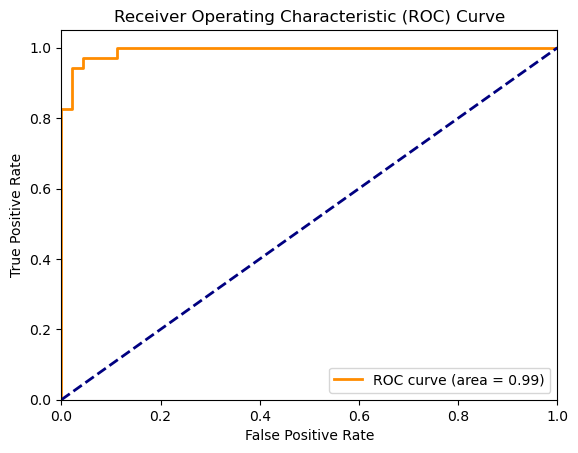

In [53]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [66]:
# Find the optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold: %.2f" % optimal_threshold)

Optimal threshold: 0.35


In [71]:
from sklearn.metrics import confusion_matrix

y_pred_optimal = (y_pred_prob >= optimal_threshold).astype(int)
cm_optimal = confusion_matrix(Y_test, y_pred_optimal)
tn, fp, fn, tp = cm_optimal.ravel()

df_cm_optimal = pd.DataFrame(cm_optimal, index=["Actual Malignant", "Actual Benign"], 
                             columns=["Predicted Malignant", "Predicted Benign"])
print(f"Confusion Matrix with Optimal Threshold ({round(optimal_threshold,2)}):\n", df_cm_optimal)


Confusion Matrix with Optimal Threshold (0.3499999940395355):
                   Predicted Malignant  Predicted Benign
Actual Malignant                   43                 2
Actual Benign                       2                67
